### Distribution of watermasses in observational data products
#### How they are changing over time

In [14]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
# import so_decadal_variability.calc as socalc
# import so_decadal_variability.process as process
# import so_decadal_variability.grid as sogrid
# import so_decadal_variability.wmt as wmt
import so_decadal_variability as so

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from dask.diagnostics import ProgressBar
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
oceannames = ['en4','iap']
timeslice = slice('1979','2018')
ds = {}
xgrid = {}
for oceanname in oceannames:
    ds[oceanname] = so.process.loaddata_oceanonly(oceanname=oceanname,timeslice=timeslice, roll=False)
    ds[oceanname], xgrid[oceanname] = so.grid.get_xgcm(ds[oceanname])

In [24]:
bins = {'gamman':np.arange(1022,1029,0.1),
       'ct':np.arange(-2,30,0.2),
       'sa':np.arange(30,36,0.05)}

In [25]:
oceanname='en4'
binned = {}
for var in bins:
    binned[var] = histogram(
        ds[oceanname][var],
        bins=[bins[var]],
        dim = ['depth','lat','lon'],
        weights=ds[oceanname]['vol4d'])

In [26]:
with ProgressBar():
    for var in bins:
        binned[var].load()

[########################################] | 100% Completed | 13.8s
[########################################] | 100% Completed | 15.0s
[########################################] | 100% Completed | 14.2s


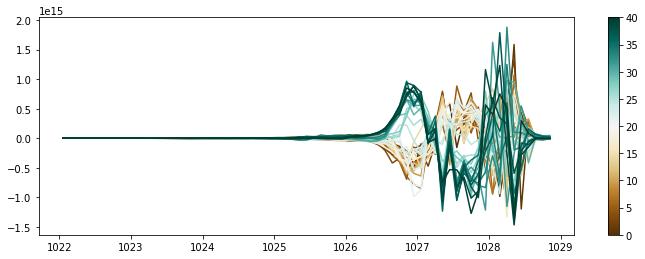

In [27]:
start = 0
stop = 1
N = len(so.calc._annual(ds[oceanname]['time']))
colors = [ cm.BrBG(x) for x in np.linspace(start, stop, N) ]
sm = plt.cm.ScalarMappable(cmap=cm.BrBG, norm=plt.Normalize(vmin=0, vmax=N))

x = binned['gamman']['gamman_bin']
fig, ax = plt.subplots(figsize = (12,4))
for t in range(N):
    ax.plot(x,so.calc._annualanom(binned['gamman']).isel(time=t),color=colors[t])
cbar = plt.colorbar(sm)

/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


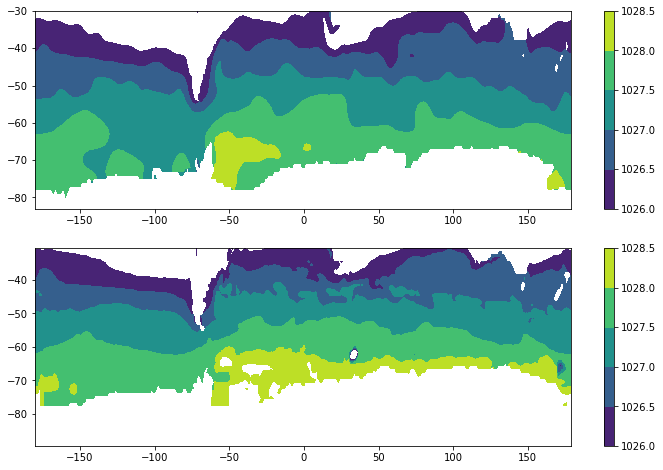

In [30]:
months = slice(6,9)
fig,(ax0,ax1) = plt.subplots(figsize=(12,8),nrows=2)


oceanname = 'en4'
dsnow = ds[oceanname]
X = dsnow['lon']
Y = dsnow['lat']
Z = dsnow['gamman'].sel(depth=slice(0,100)).mean('depth')
# Grab months
Z = Z.groupby('time.month').mean().isel(month=months).mean('month')
im = ax0.contourf(X,Y,Z,levels=np.arange(1026,1029,0.5))
plt.colorbar(im,ax=ax0)


oceanname = 'iap'
dsnow = ds[oceanname]
X = dsnow['lon']
Y = dsnow['lat']
Z = dsnow['gamman'].sel(depth=slice(0,100)).mean('depth')
# Grab months
Z = Z.groupby('time.month').mean().isel(month=months).mean('month')
im = ax1.contourf(X,Y,Z,levels=np.arange(1026,1029,0.5))
plt.colorbar(im,ax=ax1)

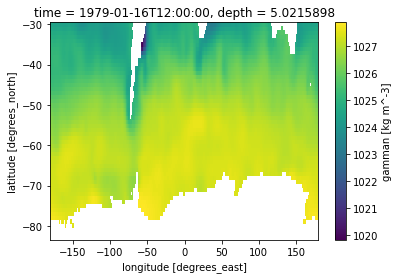

In [23]:
ds['en4']['gamman'].isel(depth=0,time=0).plot()